## Линейная регрессия

В хендауте использованы [материалы](https://www.w3schools.com/python/python_ml_linear_regression.asp), [материалы](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2), и [материалы](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem02-sklearn-linregr.ipynb).

#### Простой пример

Импортируем необходимые модули:

In [1]:
import matplotlib.pyplot as plt
from scipy import stats

Задаем произвольные x и y:

In [2]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

Рисуем изначальные наблюдения: 

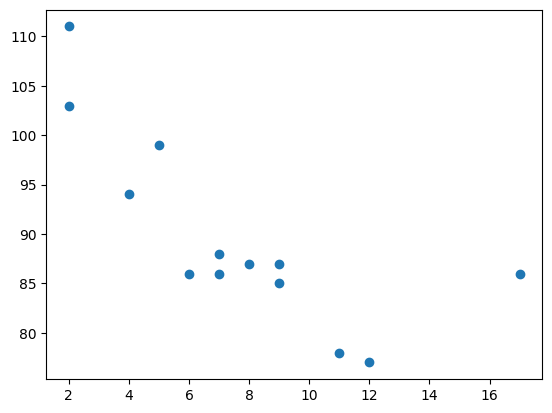

In [3]:
plt.scatter(x, y)

Можно ли предположить линейную зависимость между переменными? Если да, то какую, если -1 -- сильная обратная зависимость, 0 -- отсутствие зависимости, 1 -- сильная прямая зависимость?

Получаем значения линейной регрессии: коэффициент при x (slope), свободный член (intercept), коэффициент корреляции (r), уровень значимости (p), стандартную ошибку (std_err):

In [4]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

Определяем функцию, которая будет предсказывать новые значения:

In [6]:
def prediction_function(x):
    return slope * x + intercept 

Для каждого значения x предсказываем y согласно модели:

In [7]:
lr_model = list(map(prediction_function, x))

Рисуем линию линейной регрессии:

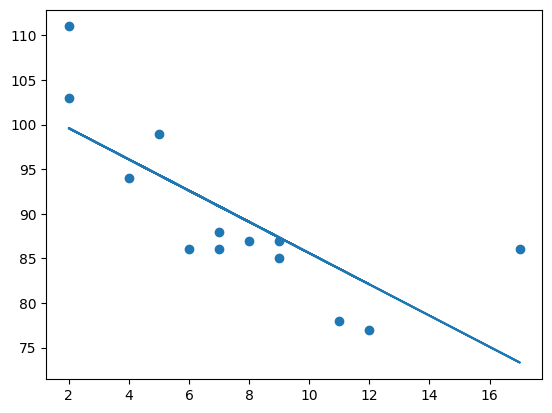

In [8]:
plt.scatter(x, y)
plt.plot(x, lr_model) 
plt.show()

Распечатываем коэффициент корреляции Пирсона: -1 -- сильная обратная зависимость, 1 -- сильная прямая зависимость, 0 -- зависимость отсутствует.

In [9]:
print(r)

-0.758591524376155


Предсказываем значение y для x = 2:

In [10]:
prediction = prediction_function(2)

print(prediction) 

99.60338484179543


#### Полиномиальная регрессия

Импортируем модули:

In [11]:
import numpy
import matplotlib.pyplot as plt 

Задаем произвольные x и y:

In [12]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

Изображаем:

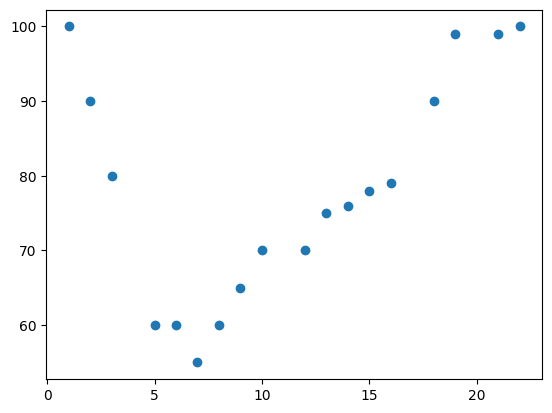

In [13]:
plt.scatter(x, y)

Задаем модель (что произойдет, если мы поменяем степень 3 на степень 10?):

In [14]:
poly_model = numpy.poly1d(numpy.polyfit(x, y, 3))

Задаем границы линии регрессии:

In [15]:
 poly_line = numpy.linspace(1, 22, 100)

Изображаем:

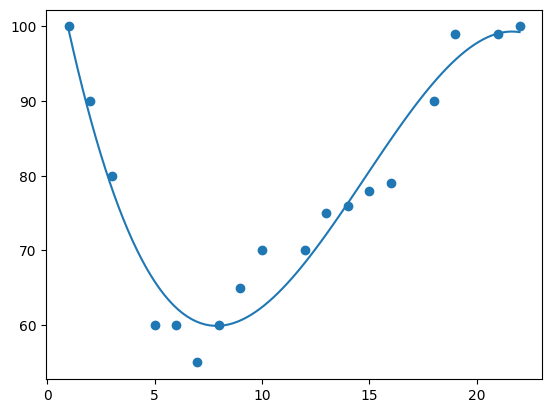

In [16]:
plt.scatter(x, y)
plt.plot(poly_line, poly_model(poly_line))
plt.show()

Вычисляем [коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8):

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y, poly_model(x))) 

0.9432150416451025


Предсказываем значение y для x = 5:

In [19]:
poly_prediction = poly_model(5)
print(poly_prediction) 

65.86970529316682


#### Линейная регрессия в ```sklearn```

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Генерируем рандомный датасет:

In [21]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

Инициируем модель, настраиваем (тренируем), предсказываем:

In [22]:
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)

Оцениваем модель:

In [23]:
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

Выводим значения:

In [24]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


Изображаем:

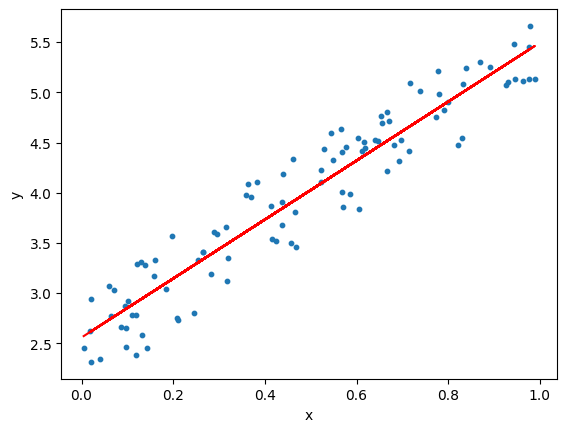

In [25]:
# наблюдения
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# предсказания
plt.plot(x, y_predicted, color='r')
plt.show()

#### Множественная регрессия

Больше одной независимой переменной. [Данные](https://www.w3schools.com/python/cars.csv)

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("cars.csv")

In [30]:
print(df.shape)
df.head()

(36, 5)


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


Независимые переменные в X, зависимая переменная y:

In [31]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [32]:
from sklearn import linear_model

In [33]:
regr = linear_model.LinearRegression() # создаем объект
regr.fit(X, y) # метод fit() берет переменные X и y в качестве параметров 

LinearRegression()

In [34]:
#предсказываем выброс CO2 машиной весом 2300кг и объемом 1300см3:
predictedCO2 = regr.predict([[2300, 1300]])

/Users/u14510182/Documents/python_for_nlp_stud/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print(predictedCO2) 

[107.2087328]


In [36]:
#распечатываем коэффициенты при независимых переменных
print(regr.coef_)

[0.00755095 0.00780526]


In [38]:
y_predicted = regr.predict(X)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

rmse, r2

(33.68279098995156, 0.37655640436199855)

Если увеличить вес машины на 1кг, выброс увеличится на 0.00755095г, если увеличить объем на 1см3, выброс увеличится на 0.00780526г.

In [39]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


#### Масштабирование

Если размерность данных не сопоставима, нужно их масштабировать. [Данные](https://www.w3schools.com/python/cars2.csv), где объем в литрах, вес в кг.

Нормализация:
z = (x - u) / s, где z -- новое значение, x -- исходное значение, u -- среднее и s -- стандартное отклонение.

Нормализуем вес:
(790 - 1292.23) / 238.74 = -2.1

Нормализуем объем:

(1.0 - 1.61) / 0.38 = -1.59

Значения становятся сопоставимыми.

In [42]:
df = pd.read_csv("cars2.csv")
print(df.shape)
df.head()

(36, 5)


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1.0,790,99
1,Mitsubishi,Space Star,1.2,1160,95
2,Skoda,Citigo,1.0,929,95
3,Fiat,500,0.9,865,90
4,Mini,Cooper,1.5,1140,105


In [ ]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale = StandardScaler()

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX[:10]) 

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]]


In [44]:
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[107.2087328]


/Users/u14510182/Documents/python_for_nlp_stud/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
y_predicted = regr.predict(scaledX)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

rmse, r2

(33.68279098995157, 0.37655640436199844)

#### Обучающая и тестовая выборки

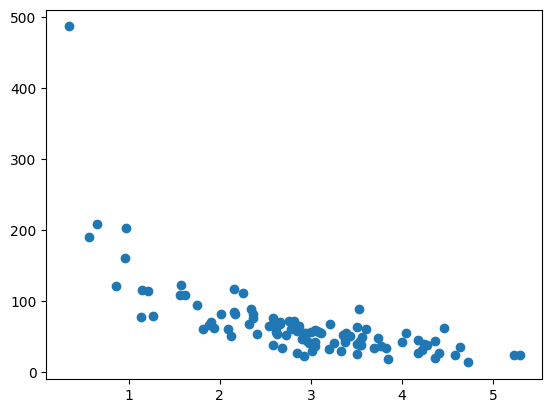

In [46]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show() 

Делим на обучающую и на тестовую:

In [47]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

Обучающая выборка:

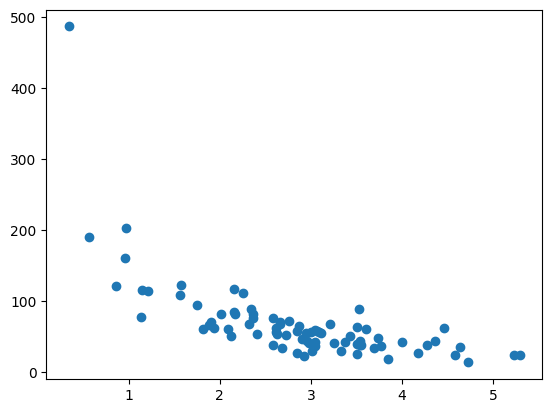

In [48]:
plt.scatter(train_x, train_y)
plt.show()

Тестовая выборка:

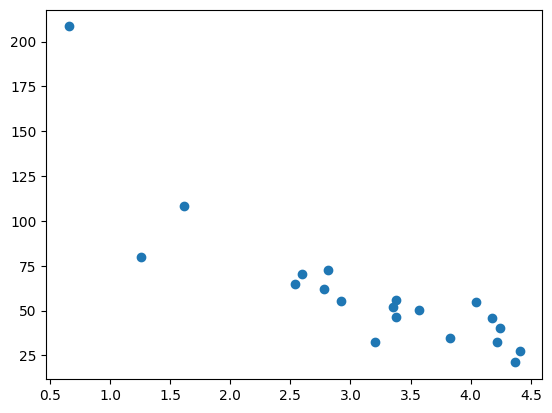

In [49]:
plt.scatter(test_x, test_y)
plt.show()

Пробуем полиномиальную регрессию:

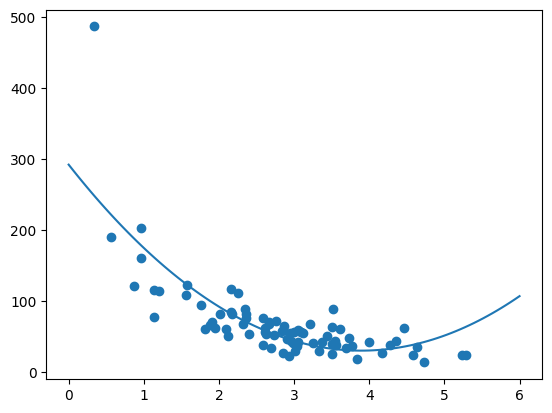

In [51]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

model = numpy.poly1d(numpy.polyfit(train_x, train_y, 2))

line = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(line, model(line))
plt.show() 

Считаем коэффициент детерминации:

In [52]:
r2 = r2_score(train_y, model(train_x))

print(r2) 

0.6304398951453632


Для тестовой выборки:

In [53]:
r2 = r2_score(test_y, model(test_x))

print(r2)

0.7381548349941074


Предсказываем значения:

In [54]:
print(model(5)) 

51.94641639781946


#### Более сложный пример 

* Обучим линейную регрессию для предсказания цены дома;
* Научимся пользоваться основными инструментами в `sklearn`: моделями, трансформерами и pipeline.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

#### Загружаем данные

Мы будем работать с данными из соревнования [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), в котором требовалось предсказать стоимость жилья. Давайте сначала загрузим и немного изучим данные (можно взять `train.csv` со страницы соревнования и переименовать в `train_sem2.csv`).

In [60]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
data.shape

(1460, 81)

In [62]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Первое, что стоит заметить &mdash; у нас в данных есть уникальное для каждого объекта поле id. Обычно такие поля только мешают и способствуют переобучению. Удалим это поле из данных.

Разделим данные на обучающую и тестовую выборки. Дополнительно нам придется отделить значения целевой переменной от данных.

In [63]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Посмотрим сначала на значения целевой переменной.

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

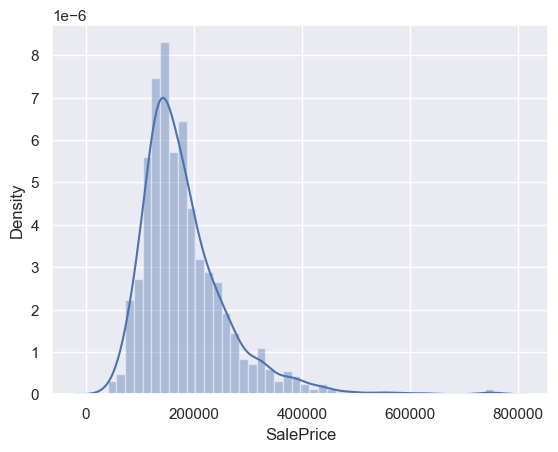

In [64]:
sns.distplot(y_train)

Судя по гистограмме, у нас есть примеры с нетипично большой стоимостью, что может помешать нам, если наша функция потерь слишком чувствительна к выбросам. В дальнейшем мы рассмотрим способы, как минимизировать ущерб от этого.

Так как для решения нашей задачи мы бы хотели обучить линейную регрессию, было бы хорошо найти признаки, "наиболее линейно" связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной. Заметим, что не все признаки являются числовыми, пока что мы не будем рассматривать такие признаки.

**Вопрос**: Что означает, что коэффициент корреляции Пирсона между двумя случайными величинами равен 1? -1? 0?

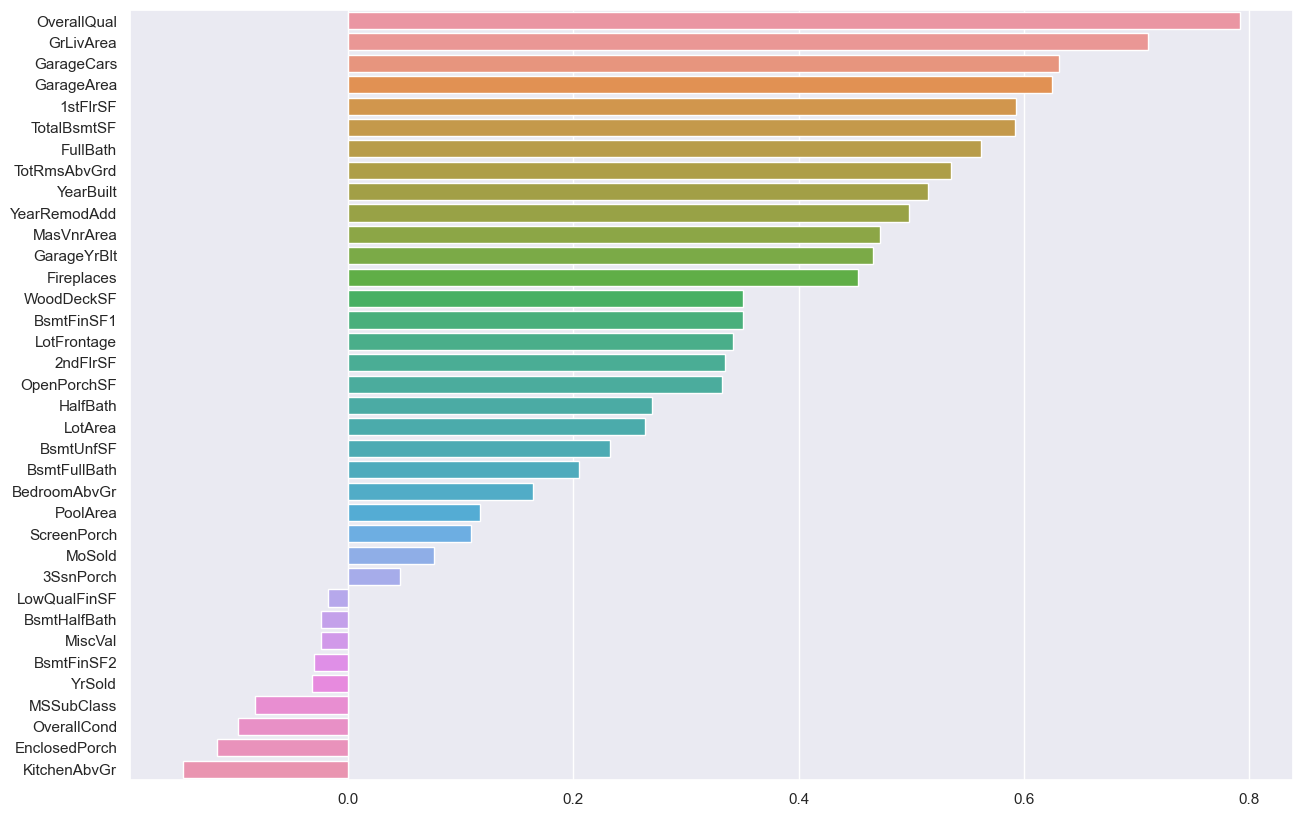

In [65]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Посмотрим на признаки из начала списка. Для этого нарисуем график зависимости целевой переменной от каждого из признаков. На этом графике каждая точка соответствует паре признак-таргет.

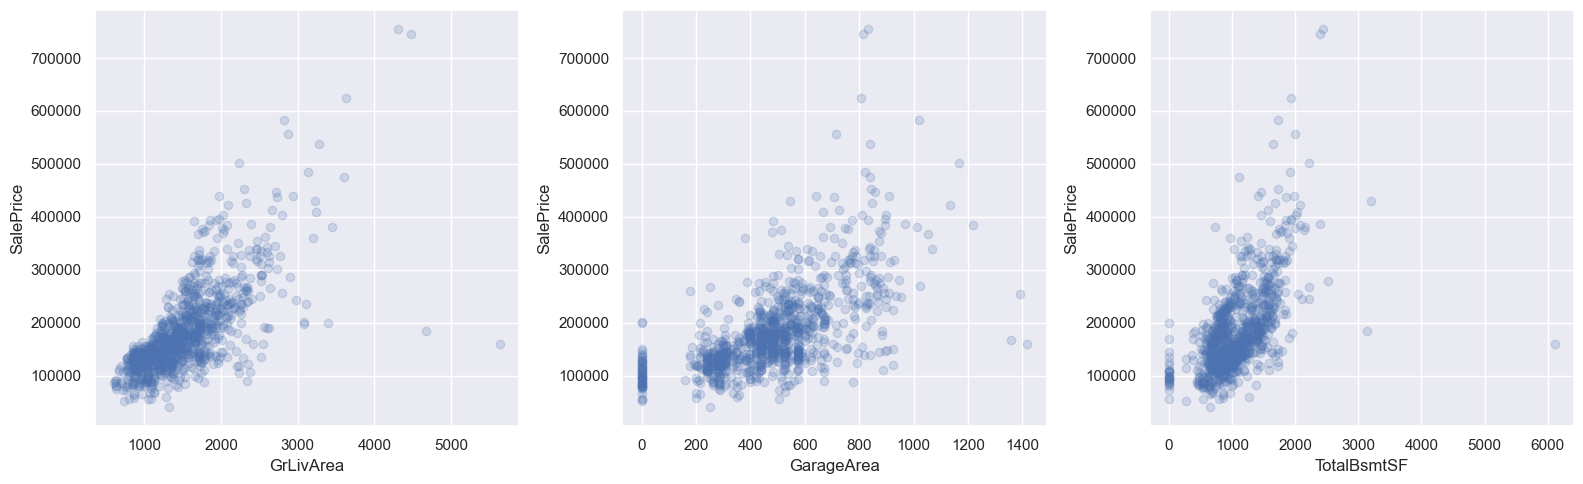

In [66]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

Видим, что между этими признаками и целевой переменной действительно наблюдается линейная зависимость.

#### Модель

Попробуем обучить линейную регрессию на числовых признаках из нашего датасета. В `sklearn` есть несколько классов, реализующих линейную регрессию:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "классическая" линейная регрессия с оптимизацией MSE (помните с прошлого занятия, что это такое?).
* [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) &mdash; линейная регрессия с оптимизацией MSE и [$\ell_2$-регуляризацией](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)
* [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) &mdash; линейная регрессия с оптимизацией MSE и [$\ell_1$-регуляризацией](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)

У моделей из `sklearn` есть методы `fit` и `predict`. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке. Попробуем обучить нашу модель на числовых признаках, которые у нас сейчас есть:

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.7681
Train RMSE = 35631.3131


Мы обучили первую модель и даже посчитали ее качество на отложенной выборке! Давайте теперь посмотрим на то, как можно оценить качество модели с помощью кросс-валидации. Принцип кросс-валидации мы обсуждали на прошлом семинаре.

При кросс-валидации мы делим обучающую выборку на $n$ частей (fold). Затем мы обучаем $n$ моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем мы измеряем качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат". После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами $n$ значений.

In [77]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -38825.3172
	-45278.9230
	-31405.3380
	-33890.1048
	-73848.3061
	-24142.7915
	-45523.7066
	-52861.2908
	-26094.3376
	-29693.5005
Mean CV MSE = 40156.3616


Обратите внимание на то, что результаты `cv_scores` получились отрицательными. Это соглашение в `sklearn` (скоринговую функцию нужно максимизировать). Поэтому все стандартные скореры называются `neg_*`, например, `neg_root_mean_squared_error`.

Для того, чтобы иметь некоторую точку отсчета, удобно посчитать оптимальное значение функции потерь при константном предсказании.

In [78]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with best constant = 76636.5188
Train RMSE with best constant = 80588.6191


Давайте посмотрим на то, какие же признаки оказались самыми "сильными". Для этого визуализируем веса, соответствующие признакам. Упрощенно, чем больше вес &mdash; тем более сильным является признак.

In [82]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

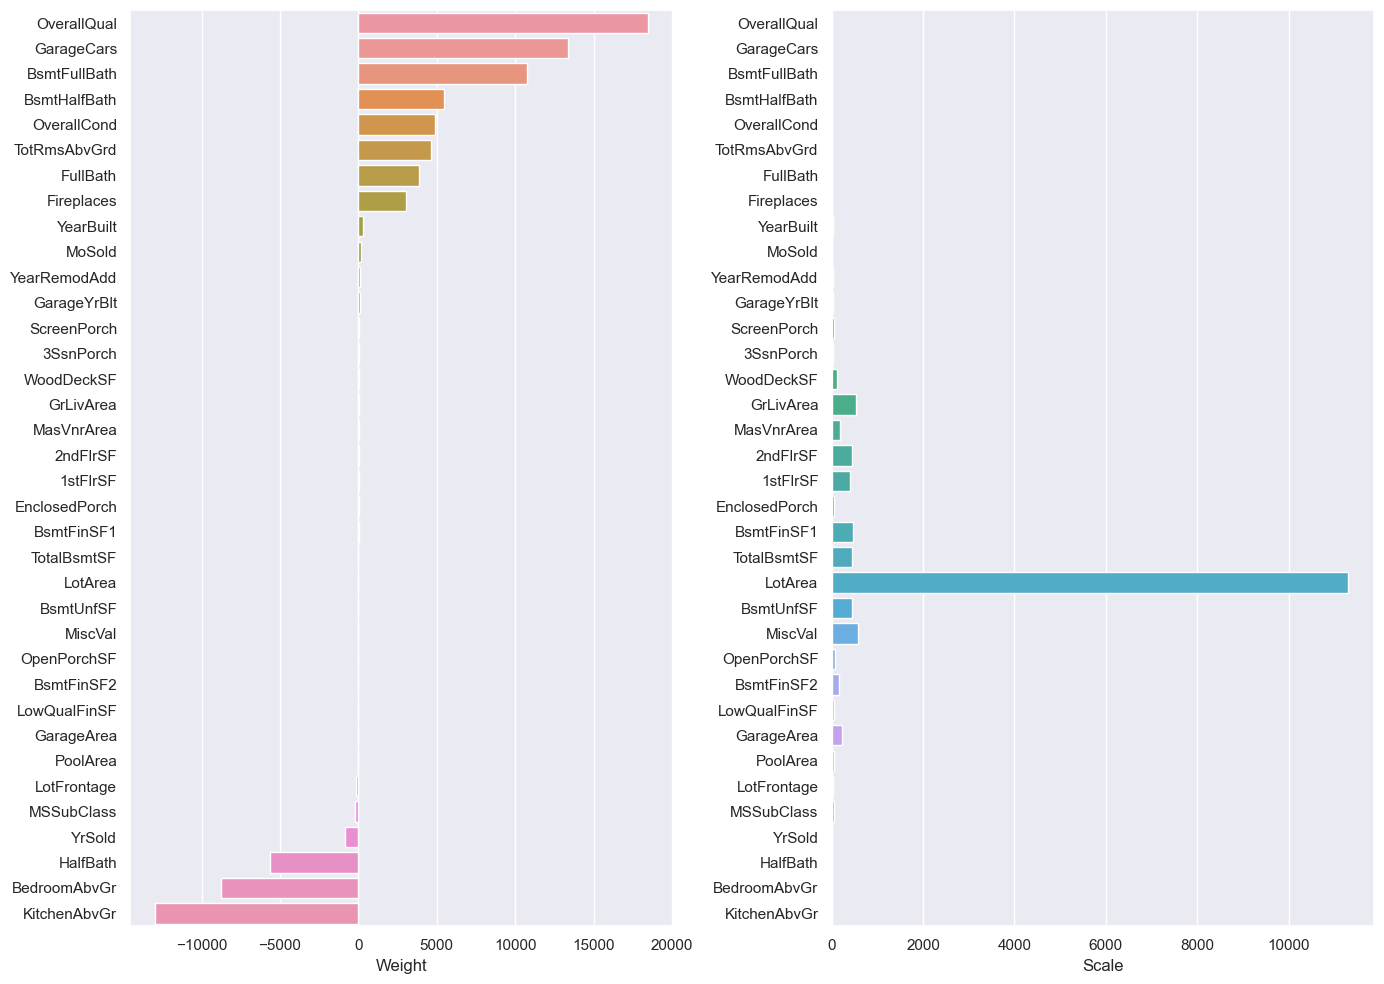

In [83]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

Будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени. 

Для этого воспользуемся трансформером [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Трансформеры в `sklearn` имеют методы `fit` и `transform` (а еще `fit_transform`). Метод `fit` принимает на вход обучающую выборку и считает по ней необходимые значения (например статистики, как `StandardScaler`: среднее и стандартное отклонение каждого из признаков). `transform` применяет преобразование к переданной выборке.

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.3150
Train RMSE = 35631.2160


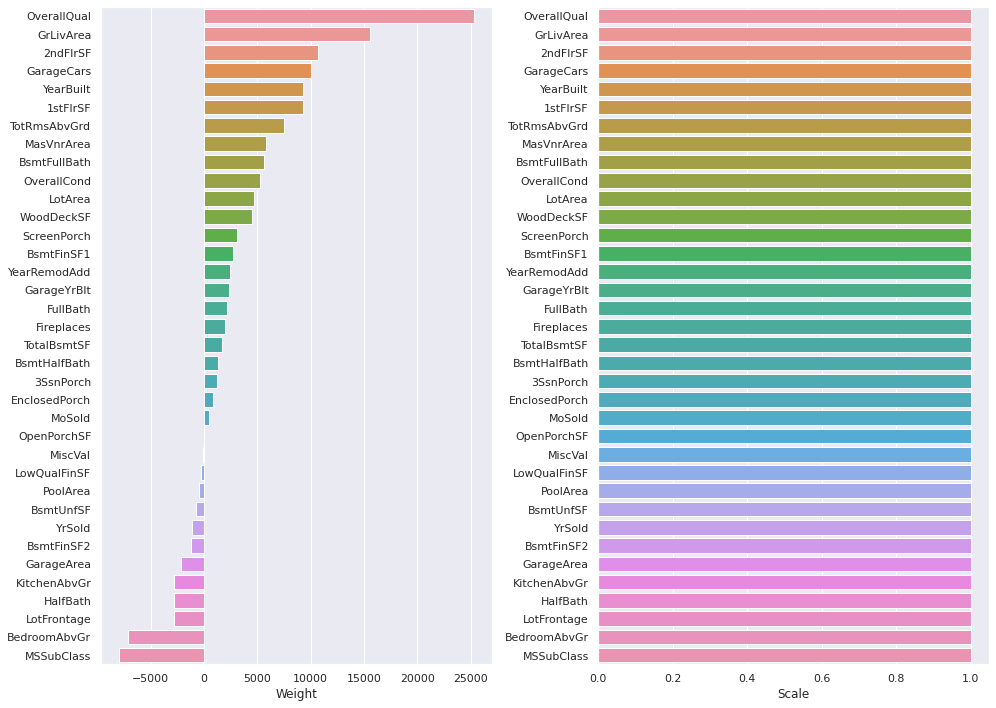

In [65]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Наряду с параметрами (весами), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это `alpha` &mdash; коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем `alpha` по логарифмической сетке, чтобы узнать оптимальный порядок величины).

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

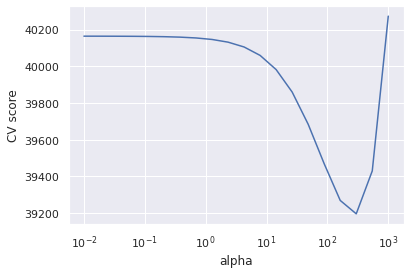

In [66]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся очень удобным классом [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод `fit`, а для тестовой &mdash; `transform`), а затем обучить/применить модель (для обучающей `fit`, а для тестовой &mdash; `predict`). `Pipeline` позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую.

In [67]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 31703.3590
